# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


We will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

We will perform Exploratory Data Analysis and Feature Engineering.


## Objectives

*   Exploratory Data Analysis
*   Preparing Data Feature Engineering


***


We will import the following libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


We will first read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


We will first try and see how the `FlightNumber` (indicating the continuous launch attempts) and `PayloadMass` variables affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code> and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


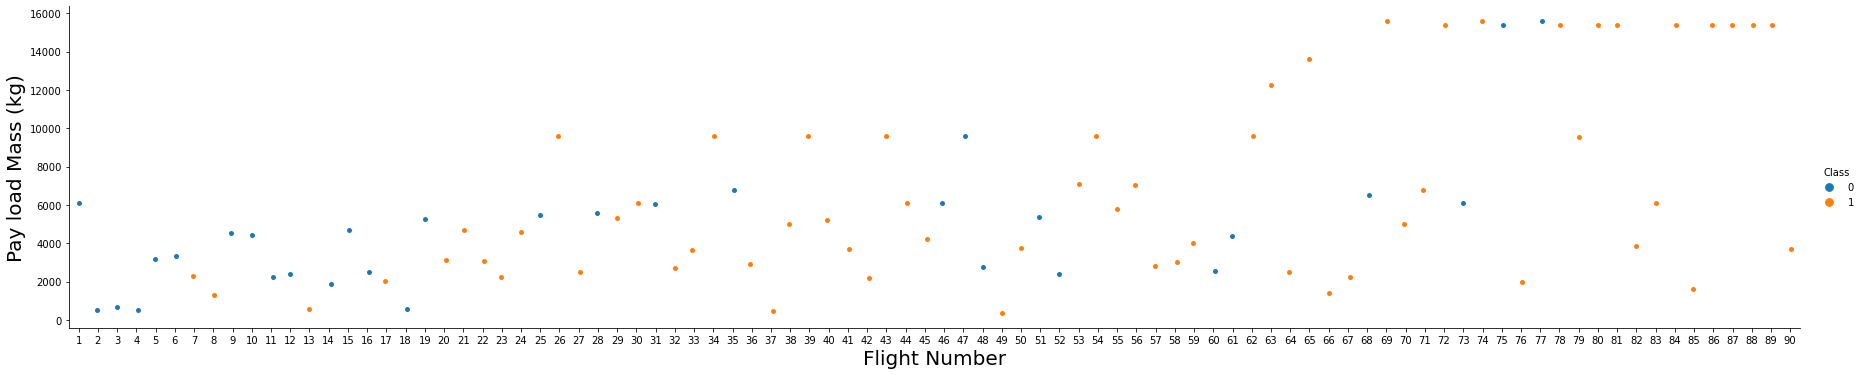

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> have a success rate of 77%.


### Visualizing the relationship between Flight Number and Launch Site


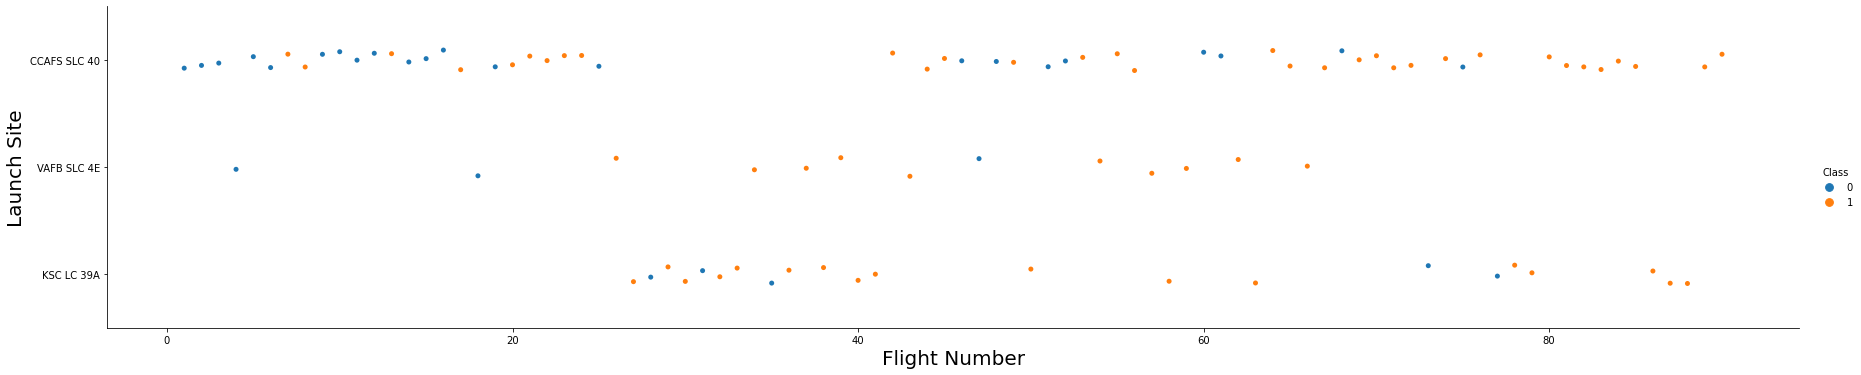

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that the higher the <code>FlightNumber</code>, the higher the success rate. We also see that `CCAFS SLC 40` had a very low success rate for the first 20 flights, but the success rate was substantially higher as the number of flights increased.

### Visualizing the relationship between Payload and Launch Site


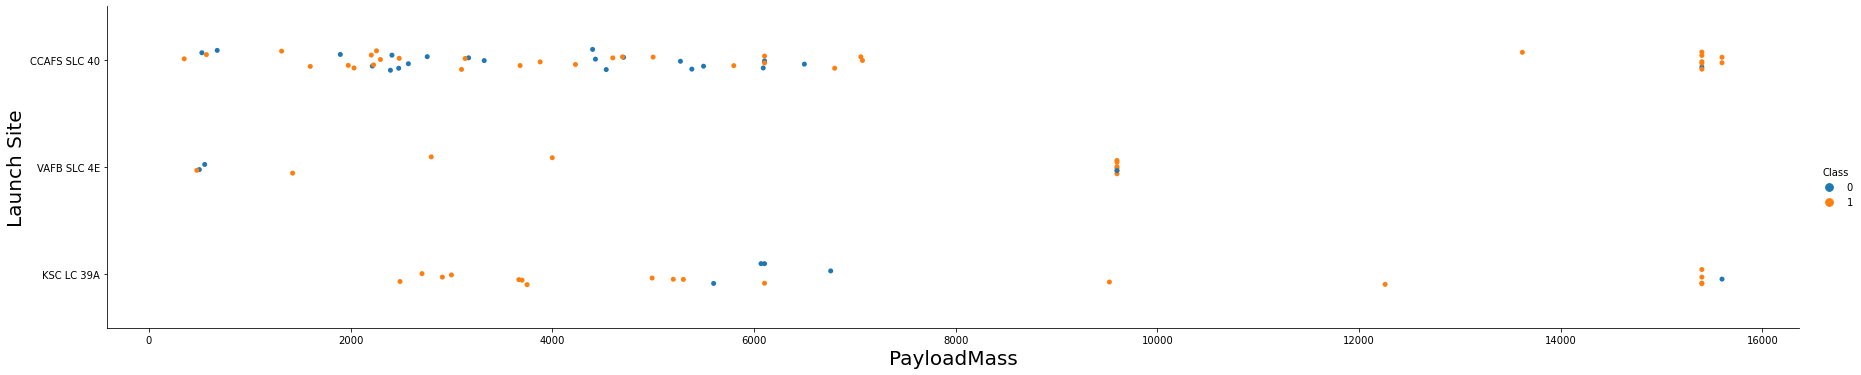

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that the VAFB-SLC launchsite had no `PayloadMass` greater than 10000 launched.

### Visualizing the relationship between the success rate of each type of orbit


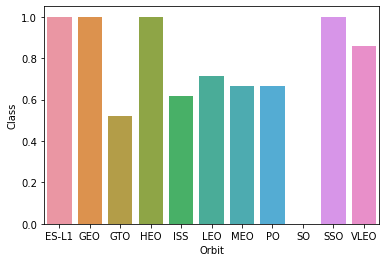

In [6]:
barchart = df.groupby(["Orbit"]).mean(["Class"]).reset_index()
barchart

sns.barplot(x="Orbit", y="Class", data=barchart)
sns.color_palette("hls", 8)
plt.show()

`ES-L1`, `GEO`, `HEO`, and `SSO` orbits all had the highest success rate

### Visualizing the relationship between FlightNumber and Orbit type


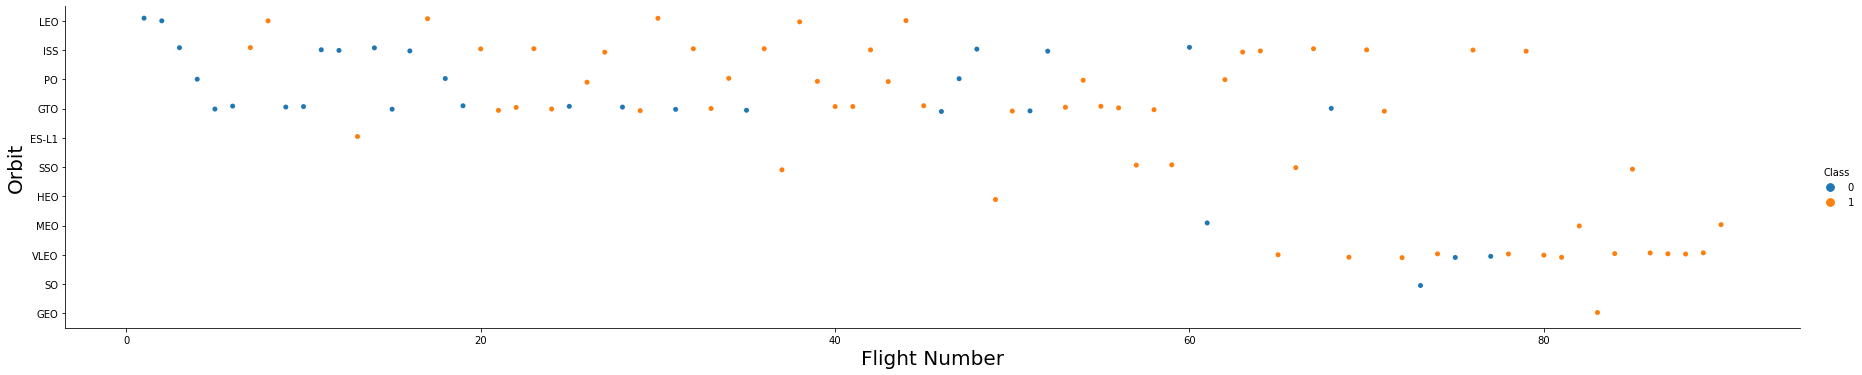

In [7]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

We see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualizing the relationship between Payload and Orbit type


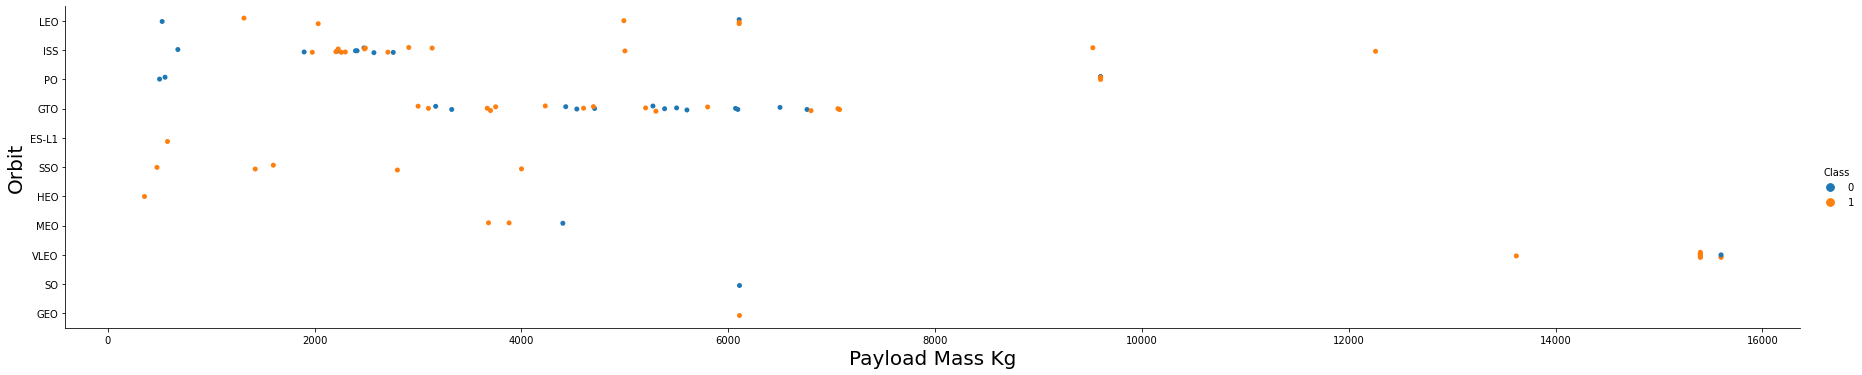

In [8]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass Kg",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads, the successful landing outcomes are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this very well as both successful outcomes and unsuccessful outcomes are both intermixed.


### Visualizing the yearly launch success trend


We will plot a line chart with the `Year` on the x axis and average success rate (`Class`) on the y axis to get the yearly average launch success trend.


In [9]:
# We will Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df['year'] = Extract_year(df["Date"])

<AxesSubplot:xlabel='year', ylabel='Class'>

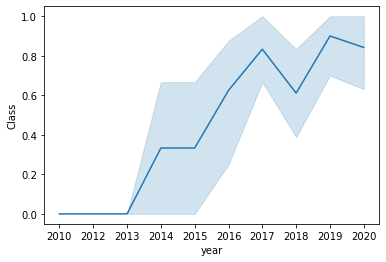

In [10]:
sns.lineplot(data=df, x="year", y="Class")

We can see from the trend that since 2013, the success rate has continued to climb year over year with small dips sprinkled in. 

## Features Engineering


We will select the features that will be used in the success prediction.


In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables to categorical columns


We will use the function <code>get_dummies</code> and the <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. We will assign the value to the variable <code>features_one_hot</code> and display the results.

In [12]:
features_one_hot = df[['Orbit','LaunchSite','LandingPad','Serial']]
features_one_hot['Orbit'] = pd.get_dummies(df['Orbit'])
features_one_hot['LaunchSite'] = pd.get_dummies(df['LaunchSite'])
features_one_hot['LandingPad'] = pd.get_dummies(df['LandingPad'])
features_one_hot['Serial'] = pd.get_dummies(df['Serial'])
features_one_hot.head()

/tmp/wsuser/ipykernel_404/4221221338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_one_hot['Orbit'] = pd.get_dummies(df['Orbit'])
/tmp/wsuser/ipykernel_404/4221221338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_one_hot['LaunchSite'] = pd.get_dummies(df['LaunchSite'])
/tmp/wsuser/ipykernel_404/4221221338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Orbit,LaunchSite,LandingPad,Serial
0,0,1,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0


###  Casting all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [16]:
features_one_hot.astype('float64')
features_one_hot

,Orbit,LaunchSite,LandingPad,Serial
0,0,1,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,1,0,0
...,...,...,...,...
85,0,0,0,0
86,0,0,0,0
87,0,0,0,0
88,0,1,0,0


We can now export it to a <b>CSV</b> for the next section.

In [18]:
features_one_hot.to_csv('eda-dataviz.csv', index=False)


## Authors


Mitchell Fargher

Credit: <a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a>, <a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Nayef Abou Tayoun</a>, and the IBM Data Science Professional Certificate
